In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)


In [4]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.8, random_state=2)

In [18]:
ns_probs = [0 for _ in range(len(testy))]


ns_probs = []

for i in range(len(testy)):
    ns_probs.append(0)




800
800


In [6]:
model = LogisticRegression()
model.fit(trainX, trainy)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [8]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

In [9]:
# summarize scores
print('Logistic: ROC AUC=' , (lr_auc))

Logistic: ROC AUC= 0.8848316539382909


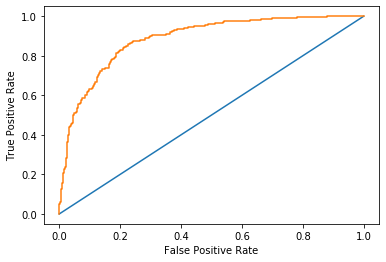

In [10]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr)
pyplot.plot(lr_fpr, lr_tpr)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()